#**MARVEL CINEMATIC UNIVERSE DATASET ANALYSIS**

#**INTRODUCTION**
The Marvel Cinematic Universe (MCU) dataset offers a comprehensive view of the films, including production details, release dates, box office performance, critical reception, and key personnel. This data enables researchers, analysts, and fans to explore trends in production, box office patterns, the impact of reviews, and the contributions of directors, producers, and actors.

Data Scope: Covers all MCU films released from [start date] to [end date] including film title, production company, release dates, director(s), producer(s), budget, box office gross, Rotten Tomatoes rating and more.

#**KEY QUESTIONS**

1. Which production company has produced the most MCU movies?

2. Is there a pattern in the release months of MCU films across different phases?

3. What is the average Rotten Tomatoes Rating for movies in the top 10 worldwide rankings?

4. Do films with higher Rotten Tomatoes ratings generally achieve higher worldwide and U.S./Canada rankings?

5. Which MCU films have generated the highest box office revenue worldwide, and how does this compare to their performance in the U.S./Canada and other territories?

6. Which directors have generated the highest total worldwide box office revenue for their MCU films?

7. Which director-producer combinations have the highest average Rotten Tomatoes ratings, indicating the most critically acclaimed collaborations?

In [1]:
#import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
sns.set(color_codes=True)

In [2]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/Mini project/MCU dataset/MCU data.csv')

In [3]:
df.head(5)

,Phase,Film,Year_Release,U.S. release date,Box office gross U.S. and Canada,Box office gross Other territories,Box office gross Worldwide,All-time ranking U.S. and Canada,All-time ranking Worldwide,Rotten Tomatoes Rating,CinemaScore,Budget,Director,Producer,movie_image
0,Phase One,Iron Man,2008,02-05-2008,"$31,90,34,126.00","$26,67,62,121.00","$58,57,96,247.00",79,176,94,A,"$14,00,00,000.00",Jon Favreau,Avi Arad and Kevin Feige,https://upload.wikimedia.org/wikipedia/en/0/02...
1,Phase One,The Incredible Hulk,2008,13-06-2008,"$13,48,06,913.00","$12,99,64,083.00","$26,47,70,996.00",465,593,67,A−,"$15,00,00,000.00",Louis Leterrier,"Avi Arad, Gale Anne Hurdand Kevin Feige",https://upload.wikimedia.org/wikipedia/en/f/f0...
2,Phase One,Iron Man 2,2010,07-05-2010,"$31,24,33,331.00","$31,15,00,000.00","$62,39,33,331.00",85,158,71,A,"$20,00,00,000.00",Jon Favreau,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/e/ed...
3,Phase One,Thor,2011,06-05-2011,"$18,10,30,624.00","$26,82,95,994.00","$44,93,26,618.00",262,268,77,B+,"$15,00,00,000.00",Kenneth Branagh,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/9/95...
4,Phase One,Captain America: The First Avenger,2011,22-07-2011,"$17,66,54,505.00","$19,39,15,269.00","$37,05,69,774.00",279,367,79,A−,"$14,00,00,000.00",Joe Johnston,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/3/37...


In [4]:
df.tail(5)

,Phase,Film,Year_Release,U.S. release date,Box office gross U.S. and Canada,Box office gross Other territories,Box office gross Worldwide,All-time ranking U.S. and Canada,All-time ranking Worldwide,Rotten Tomatoes Rating,CinemaScore,Budget,Director,Producer,movie_image
27,Phase Four,Doctor Strange in the Multiverse of Madness,2022,06-05-2022,"$41,13,31,607.00","$54,44,44,197.00","$95,57,75,804.00",36,60,74,B+,"$20,00,00,000.00",Sam Raimi,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/1/17...
28,Phase Four,Thor: Love and Thunder,2022,08-07-2022,"$34,32,56,830.00","$41,76,71,251.00","$76,09,28,081.00",65,113,64,B+,"$25,00,00,000.00",Taika Waititi,Kevin Feige and Brad Winderbaum,https://upload.wikimedia.org/wikipedia/en/8/88...
29,Phase Four,Black Panther: Wakanda Forever,2022,11-11-2022,"$45,37,86,760.00","$40,47,37,869.00","$85,85,24,629.00",24,84,84,A,"$25,00,00,000.00",Ryan Coogler,Kevin Feige and Nate Moore,https://upload.wikimedia.org/wikipedia/en/3/3b...
30,Phase Five,Ant-Man and the Wasp: Quantumania,2023,17-02-2023,"$21,44,69,569.00","$26,15,66,271.00","$47,60,35,840.00",200,253,47,B,"$20,00,00,000.00",Peyton Reed,Kevin Feige and Stephen Broussard,https://upload.wikimedia.org/wikipedia/en/3/30...
31,Phase Five,Guardians of the Galaxy Vol. 3,2023,05-05-2023,"$30,47,75,817.00","$41,87,21,132.00","$72,34,96,949.00",119,150,82,A,"$25,00,00,000.00",James Gunn,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/7/74...


In [5]:
df.shape

(32, 15)

In [6]:
df.columns

Index(['Phase', 'Film', 'Year_Release', 'U.S. release date',
       ' Box office gross U.S. and Canada ',
       ' Box office gross Other territories ', ' Box office gross Worldwide ',
       'All-time ranking U.S. and Canada', 'All-time ranking Worldwide',
       'Rotten Tomatoes Rating', 'CinemaScore', ' Budget ', 'Director',
       'Producer', 'movie_image'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Phase                                 32 non-null     object
 1   Film                                  32 non-null     object
 2   Year_Release                          32 non-null     int64 
 3   U.S. release date                     32 non-null     object
 4    Box office gross U.S. and Canada     32 non-null     object
 5    Box office gross Other territories   32 non-null     object
 6    Box office gross Worldwide           32 non-null     object
 7   All-time ranking U.S. and Canada      32 non-null     int64 
 8   All-time ranking Worldwide            32 non-null     int64 
 9   Rotten Tomatoes Rating                32 non-null     int64 
 10  CinemaScore                           32 non-null     object
 11   Budget                           

In [8]:
#checked duplicate value
df.duplicated().sum()

0

In [9]:
#change the columns into datetime format
df['Year_Release']=pd.to_datetime(df['Year_Release'],errors='coerce')
df['U.S. release date']=pd.to_datetime(df['U.S. release date'], format='%d-%m-%Y',errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Phase                                 32 non-null     object        
 1   Film                                  32 non-null     object        
 2   Year_Release                          32 non-null     datetime64[ns]
 3   U.S. release date                     32 non-null     datetime64[ns]
 4    Box office gross U.S. and Canada     32 non-null     object        
 5    Box office gross Other territories   32 non-null     object        
 6    Box office gross Worldwide           32 non-null     object        
 7   All-time ranking U.S. and Canada      32 non-null     int64         
 8   All-time ranking Worldwide            32 non-null     int64         
 9   Rotten Tomatoes Rating                32 non-null     int64         
 10  Cine

In [11]:
for i in df.columns:
  print(i)

Phase
Film
Year_Release
U.S. release date
 Box office gross U.S. and Canada 
 Box office gross Other territories 
 Box office gross Worldwide 
All-time ranking U.S. and Canada
All-time ranking Worldwide
Rotten Tomatoes Rating
CinemaScore
 Budget 
Director
Producer
movie_image


In [12]:
def clean_currency(x):
  """
  This function cleans the currency values by removing commas, dollar signs, and spaces,
  and then converting the result to an integer.

  Args:
    x: The input value.

  Returns:
    The cleaned integer value, or NaN if the input is not valid.
  """
  try:
    return int(x.replace('$', '').replace(',', '').replace(' ', '').replace('.00',''))
  except (ValueError, AttributeError):
    return np.nan

df['Box office gross U.S. and Canada'] = df[' Box office gross U.S. and Canada '].apply(clean_currency).astype(np.int64)
df['Box office gross Other territories']=df[' Box office gross Other territories '].apply(clean_currency).astype(np.int64)
df['Budget']=df[' Budget '].apply(clean_currency).astype(np.int64)
df['Box office gross Worldwide']=df[' Box office gross Worldwide '].apply(clean_currency).astype(np.int64)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Phase                                 32 non-null     object        
 1   Film                                  32 non-null     object        
 2   Year_Release                          32 non-null     datetime64[ns]
 3   U.S. release date                     32 non-null     datetime64[ns]
 4    Box office gross U.S. and Canada     32 non-null     object        
 5    Box office gross Other territories   32 non-null     object        
 6    Box office gross Worldwide           32 non-null     object        
 7   All-time ranking U.S. and Canada      32 non-null     int64         
 8   All-time ranking Worldwide            32 non-null     int64         
 9   Rotten Tomatoes Rating                32 non-null     int64         
 10  Cine

In [14]:
for i in df.columns:
  print(i)

Phase
Film
Year_Release
U.S. release date
 Box office gross U.S. and Canada 
 Box office gross Other territories 
 Box office gross Worldwide 
All-time ranking U.S. and Canada
All-time ranking Worldwide
Rotten Tomatoes Rating
CinemaScore
 Budget 
Director
Producer
movie_image
Box office gross U.S. and Canada
Box office gross Other territories
Budget
Box office gross Worldwide


In [15]:
#drop duplicate columns
df.drop([' Box office gross U.S. and Canada ',' Box office gross Other territories ',' Box office gross Worldwide ','Budget'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Phase                               32 non-null     object        
 1   Film                                32 non-null     object        
 2   Year_Release                        32 non-null     datetime64[ns]
 3   U.S. release date                   32 non-null     datetime64[ns]
 4   All-time ranking U.S. and Canada    32 non-null     int64         
 5   All-time ranking Worldwide          32 non-null     int64         
 6   Rotten Tomatoes Rating              32 non-null     int64         
 7   CinemaScore                         32 non-null     object        
 8    Budget                             32 non-null     object        
 9   Director                            32 non-null     object        
 10  Producer                    

In [17]:
df.shape

(32, 15)

In [18]:
df[' Budget ']=df[' Budget '].apply(clean_currency).astype(np.int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Phase                               32 non-null     object        
 1   Film                                32 non-null     object        
 2   Year_Release                        32 non-null     datetime64[ns]
 3   U.S. release date                   32 non-null     datetime64[ns]
 4   All-time ranking U.S. and Canada    32 non-null     int64         
 5   All-time ranking Worldwide          32 non-null     int64         
 6   Rotten Tomatoes Rating              32 non-null     int64         
 7   CinemaScore                         32 non-null     object        
 8    Budget                             32 non-null     int64         
 9   Director                            32 non-null     object        
 10  Producer                    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Phase                               32 non-null     object        
 1   Film                                32 non-null     object        
 2   Year_Release                        32 non-null     datetime64[ns]
 3   U.S. release date                   32 non-null     datetime64[ns]
 4   All-time ranking U.S. and Canada    32 non-null     int64         
 5   All-time ranking Worldwide          32 non-null     int64         
 6   Rotten Tomatoes Rating              32 non-null     int64         
 7   CinemaScore                         32 non-null     object        
 8    Budget                             32 non-null     int64         
 9   Director                            32 non-null     object        
 10  Producer                    

In [21]:
#drop unwanted columns
df.drop([' Budget ','movie_image'],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Phase                               32 non-null     object        
 1   Film                                32 non-null     object        
 2   Year_Release                        32 non-null     datetime64[ns]
 3   U.S. release date                   32 non-null     datetime64[ns]
 4   All-time ranking U.S. and Canada    32 non-null     int64         
 5   All-time ranking Worldwide          32 non-null     int64         
 6   Rotten Tomatoes Rating              32 non-null     int64         
 7   CinemaScore                         32 non-null     object        
 8   Director                            32 non-null     object        
 9   Producer                            32 non-null     object        
 10  Box office gross U.S. and Ca

In [23]:
#checking null values
df.isnull().sum()

,0
Phase,0
Film,0
Year_Release,0
U.S. release date,0
All-time ranking U.S. and Canada,0
All-time ranking Worldwide,0
Rotten Tomatoes Rating,0
CinemaScore,0
Director,0
Producer,0


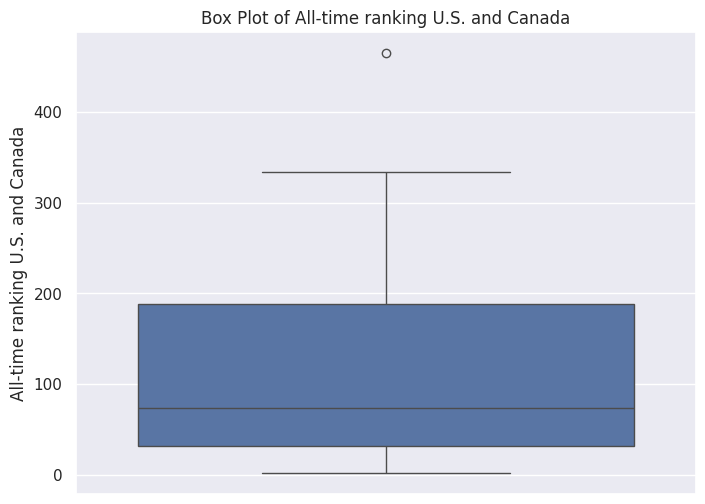

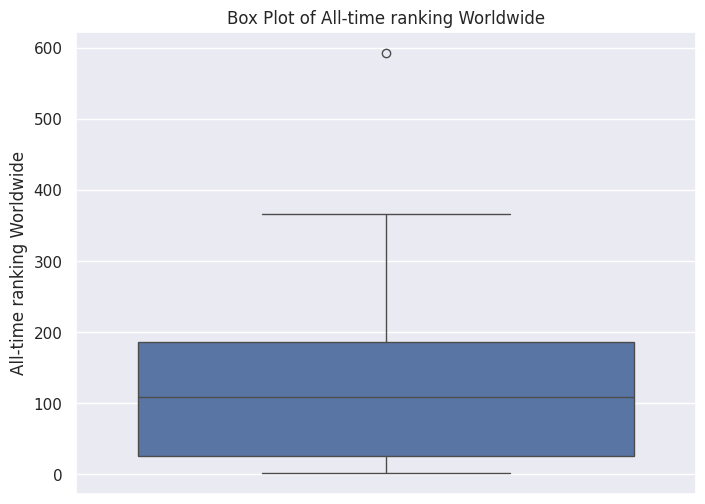

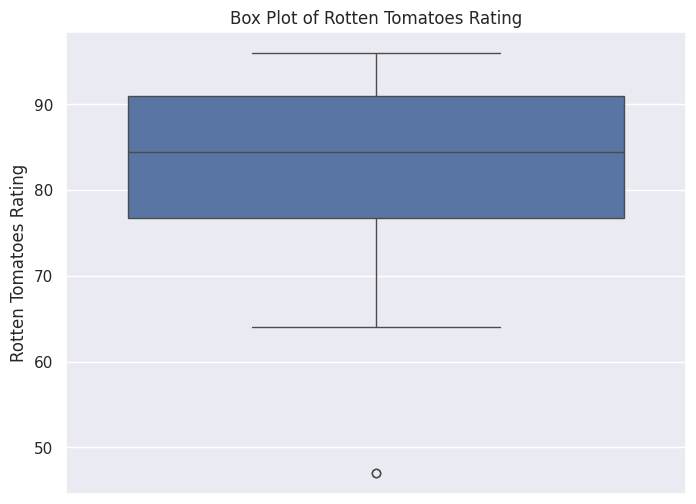

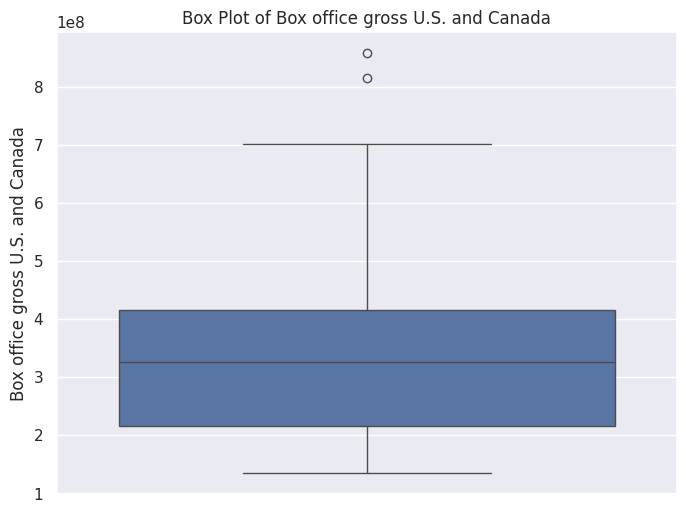

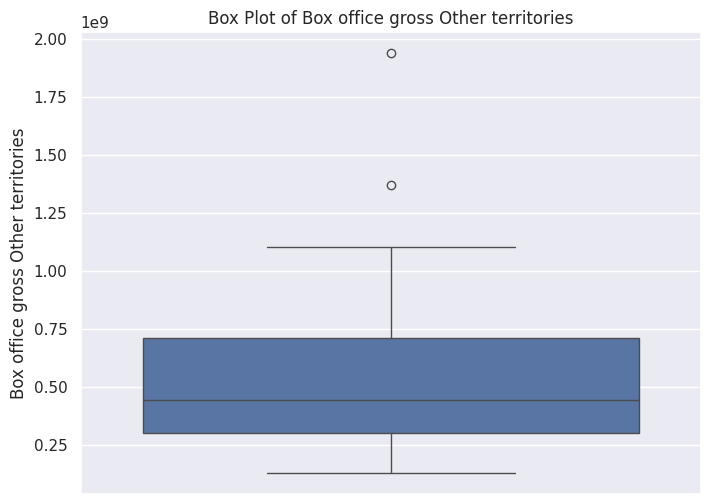

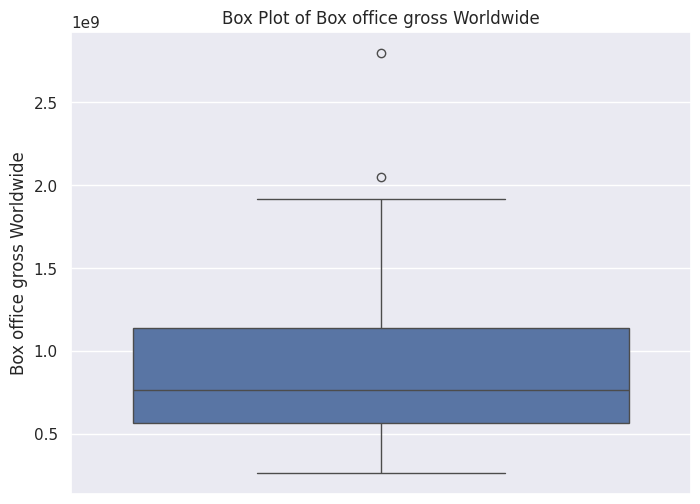

In [24]:
#checking ouliters
for col in df.select_dtypes(include=['number']).columns:
       plt.figure(figsize=(8, 6))
       sns.boxplot(y=df[col])
       plt.title(f'Box Plot of {col}')
       plt.ylabel(col)
       plt.show()

#1. Which production company has produced the most MCU movies?

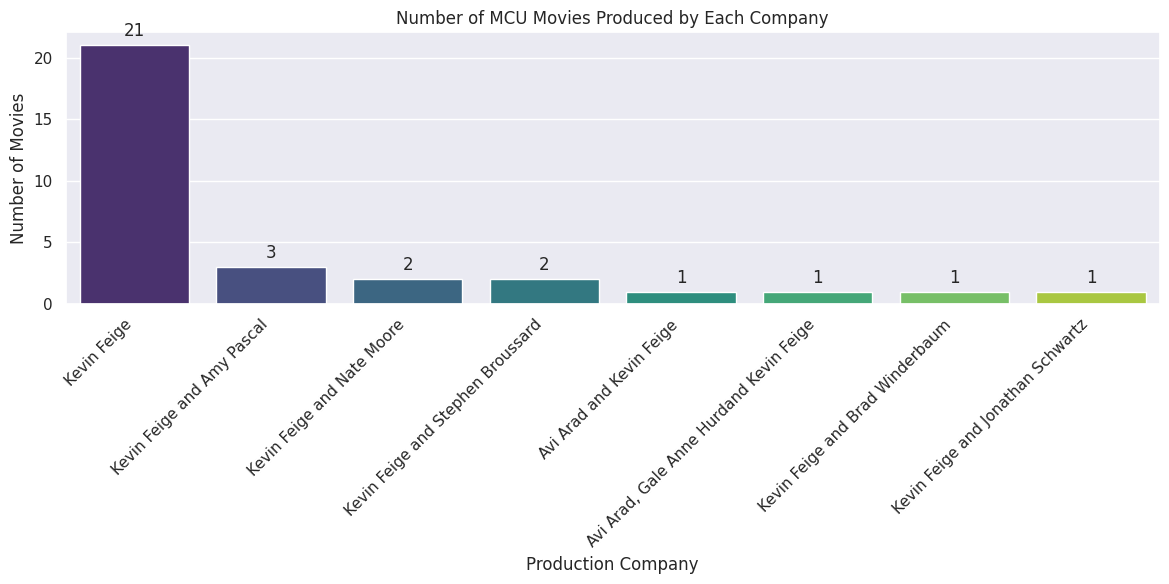

In [28]:
# @title Number of MCU Movies Produced by Each Company
# Group data by 'Production company' and count the number of movies for each company
production_counts = df.groupby('Producer')['Film'].count().sort_values(ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=production_counts.index, y=production_counts.values, palette='viridis')
plt.xlabel("Production Company")
plt.ylabel("Number of Movies")
plt.title("Number of MCU Movies Produced by Each Company")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

Marvel Studios has produced the most MCU movies, significantly outpacing other production companies.

#2. Is there a pattern in the release months of MCU films across different phases?

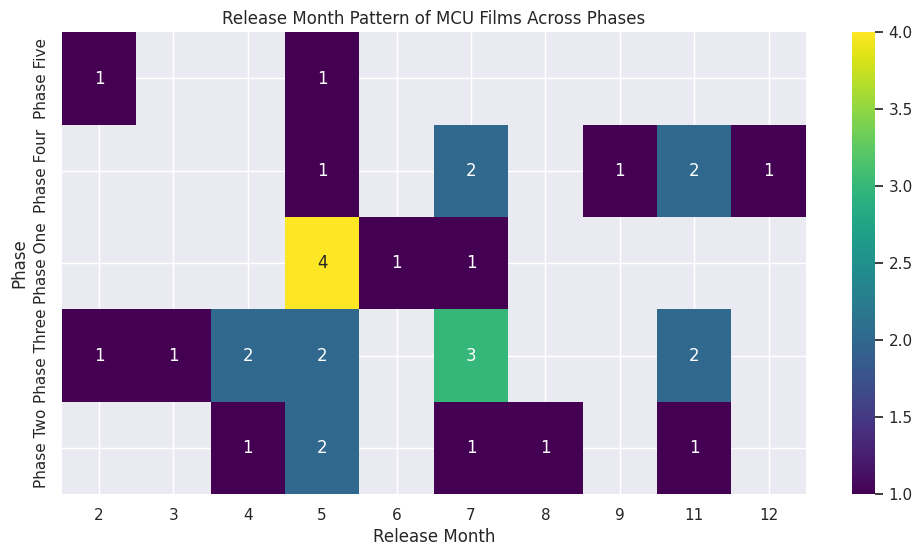

In [26]:
# @title Release Month Pattern of MCU Films Across Phases
df['Release_Month'] = df['U.S. release date'].dt.month
release_pattern = df.groupby(['Phase', 'Release_Month'])['Film'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.heatmap(release_pattern.pivot(index='Phase', columns='Release_Month', values='Film'),
            annot=True,
            cmap='viridis',
            fmt='.0f')  # Change the format code to '.0f' to display floats as integers without decimal places
plt.title('Release Month Pattern of MCU Films Across Phases')
plt.xlabel('Release Month')
plt.ylabel('Phase')
plt.show()

MCU films are most frequently released in May and November, possibly targeting summer and holiday seasons.

#3. What is the average Rotten Tomatoes Rating for movies in the top 10 worldwide rankings?

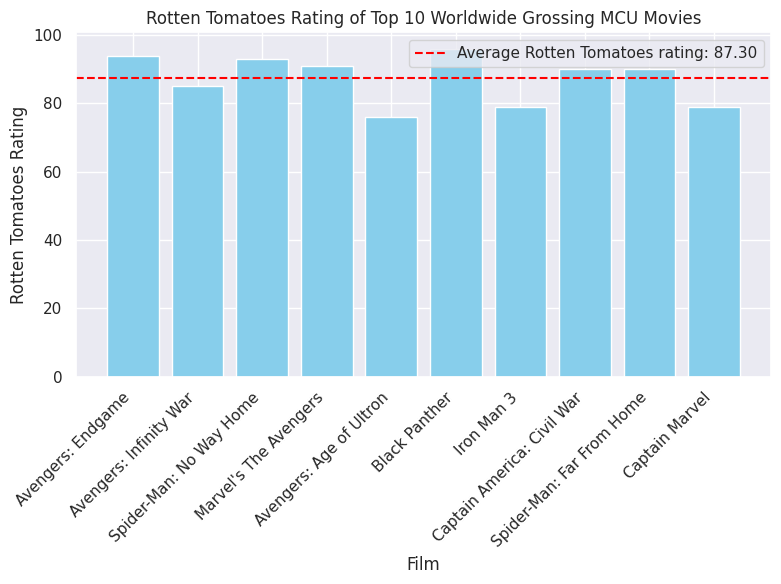

In [29]:
# @title Rotten Tomatoes Rating of Top 10 Worldwide Grossing MCU Movies
top_10_worldwide = df.sort_values(by=['Box office gross Worldwide'], ascending=False).head(10)
avg_cinemascore = top_10_worldwide['Rotten Tomatoes Rating'].mean()
plt.figure(figsize=(8, 6))
plt.bar(top_10_worldwide['Film'], top_10_worldwide['Rotten Tomatoes Rating'], color='skyblue')
plt.axhline(y=avg_cinemascore, color='red', linestyle='--', label=f'Average Rotten Tomatoes rating: {avg_cinemascore:.2f}')
plt.xlabel("Film")
plt.ylabel("Rotten Tomatoes Rating")
plt.title("Rotten Tomatoes Rating of Top 10 Worldwide Grossing MCU Movies")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The top 10 worldwide grossing MCU movies generally have high Rotten Tomatoes ratings, indicating a link between critical acclaim and box office success.

#4. Do films with higher Rotten Tomatoes ratings generally achieve higher worldwide and U.S./Canada rankings?

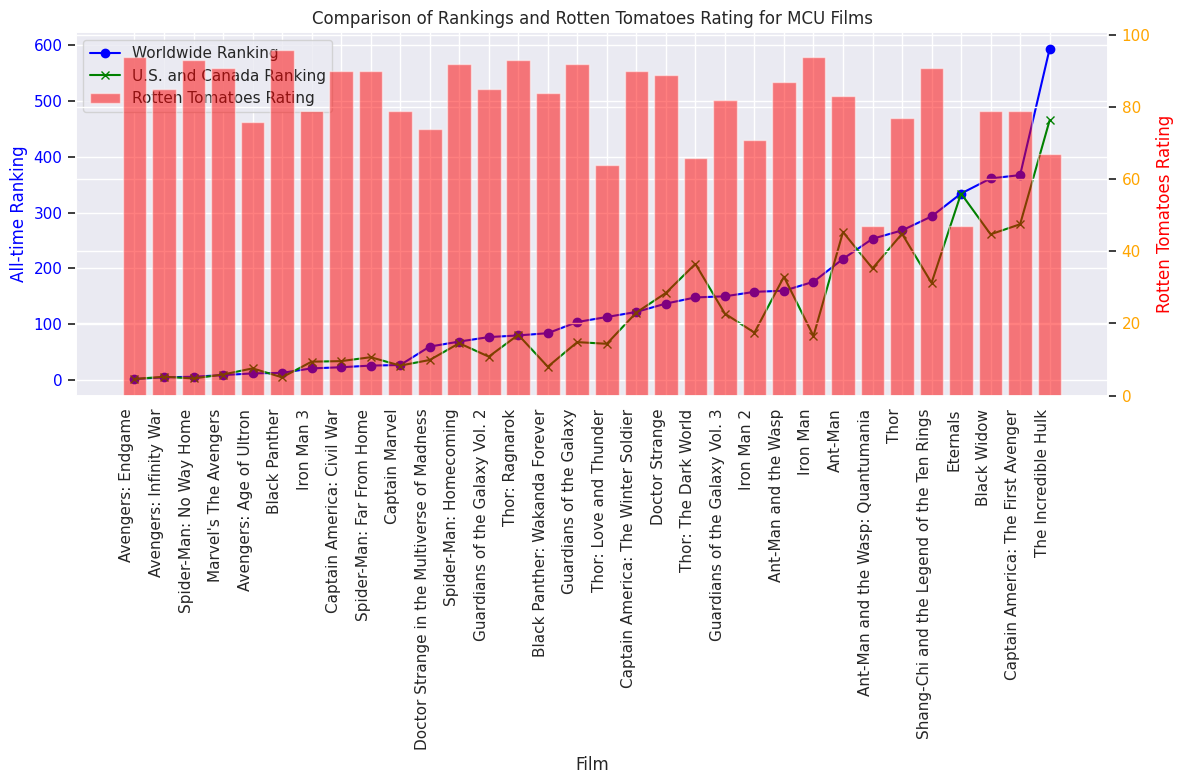

In [30]:
# @title Comparison of Rankings and Rotten Tomatoes Rating for MCU Films
# Select the relevant columns
rankings_df = df[['Film', 'All-time ranking Worldwide', 'All-time ranking U.S. and Canada', 'Rotten Tomatoes Rating']]

# Sort by 'All-time ranking Worldwide' for better visualization
rankings_df = rankings_df.sort_values(by=['All-time ranking Worldwide'])

# Create a figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'All-time ranking Worldwide' and 'All-time ranking U.S. and Canada' on the primary y-axis
ax1.plot(rankings_df['Film'], rankings_df['All-time ranking Worldwide'], marker='o', label='Worldwide Ranking', color='blue')
ax1.plot(rankings_df['Film'], rankings_df['All-time ranking U.S. and Canada'], marker='x', label='U.S. and Canada Ranking', color='green')
ax1.set_xlabel('Film')
ax1.set_ylabel('All-time Ranking', color='blue')
ax1.tick_params('y', labelcolor='blue')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability

# Create a secondary y-axis for 'Rotten Tomatoes Rating'
ax2 = ax1.twinx()
ax2.bar(rankings_df['Film'], rankings_df['Rotten Tomatoes Rating'], alpha=0.5, label='Rotten Tomatoes Rating', color='red')  # Use bar plot for ratings
ax2.set_ylabel('Rotten Tomatoes Rating', color='red')
ax2.tick_params('y', labelcolor='orange')

# Add legends and title
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')
plt.title('Comparison of Rankings and Rotten Tomatoes Rating for MCU Films')

# Show the plot
plt.tight_layout()
plt.show()

Films with higher Rotten Tomatoes ratings tend to achieve higher worldwide and U.S./Canada rankings, suggesting a correlation.

#5.  Which MCU films have generated the highest box office revenue worldwide, and how does this compare to their performance in the U.S./Canada and other territories?

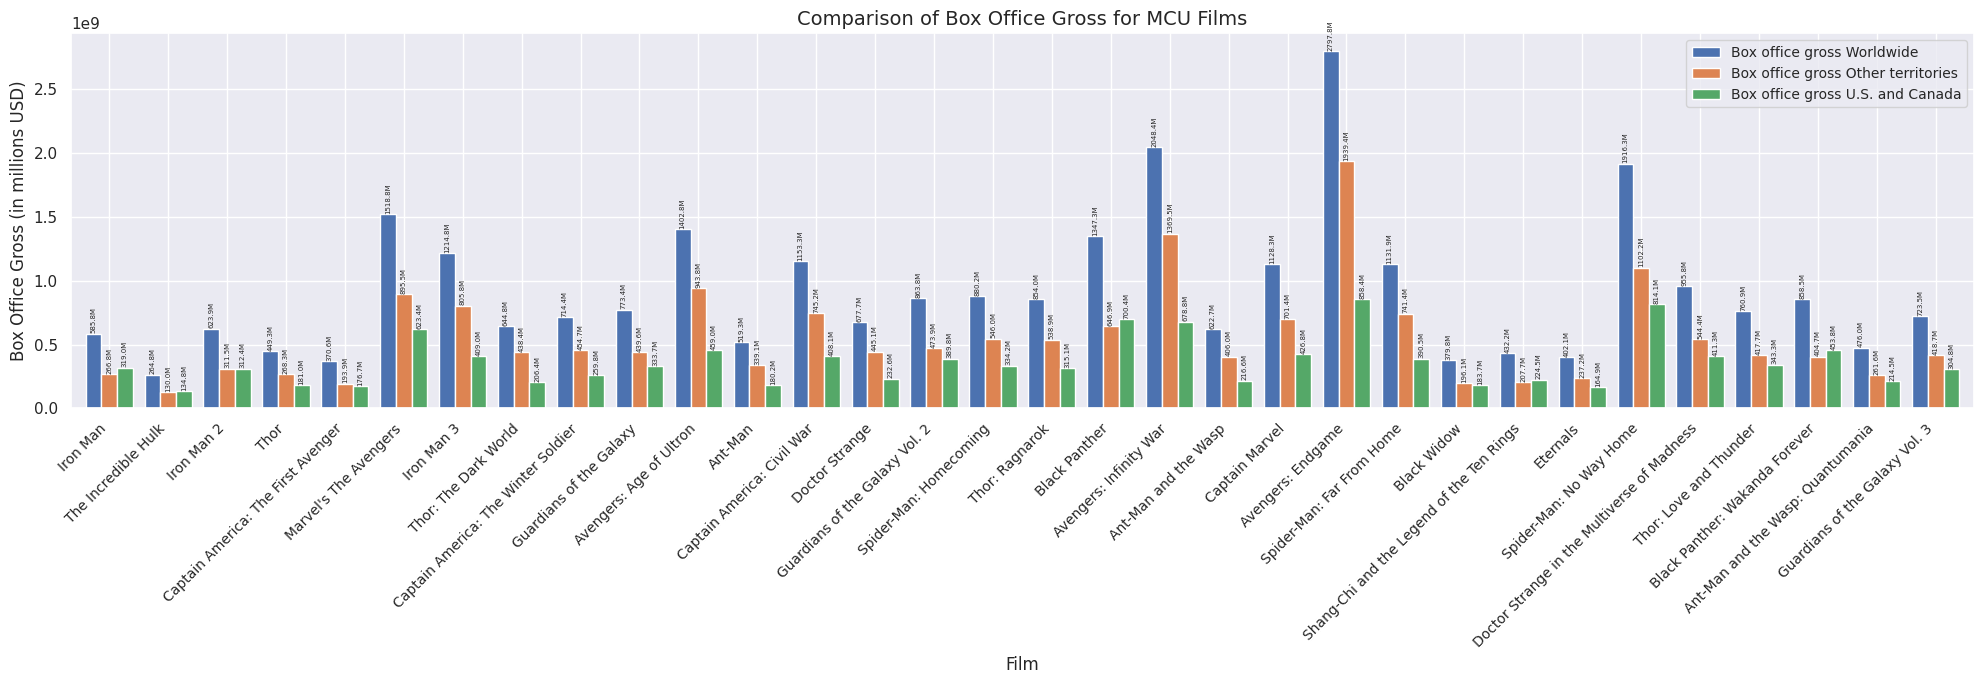

In [36]:
# @title Comparison of Box Office Gross for MCU Films
# Select the relevant columns
box_office_df = df[['Film', 'Box office gross Worldwide', 'Box office gross Other territories', 'Box office gross U.S. and Canada']]

# Set the 'Film' column as the index
box_office_df = box_office_df.set_index('Film')

# Create a grouped bar chart
ax = box_office_df.plot(kind='bar', figsize=(20, 7), width=0.8)  # Adjust figure size and bar width

# Customize the plot
plt.title('Comparison of Box Office Gross for MCU Films', fontsize=14)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Box Office Gross (in millions USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height / 1000000:.1f}M', (x + width / 2, y + height + 10000000), ha='center', fontsize=5,rotation=90)  # Format labels in millions

# Show the plot
plt.show()

"Avengers: Endgame" has the highest worldwide box office gross, with significant contributions from both U.S./Canada and other territories.

#6. Which directors have generated the highest total worldwide box office revenue for their MCU films?

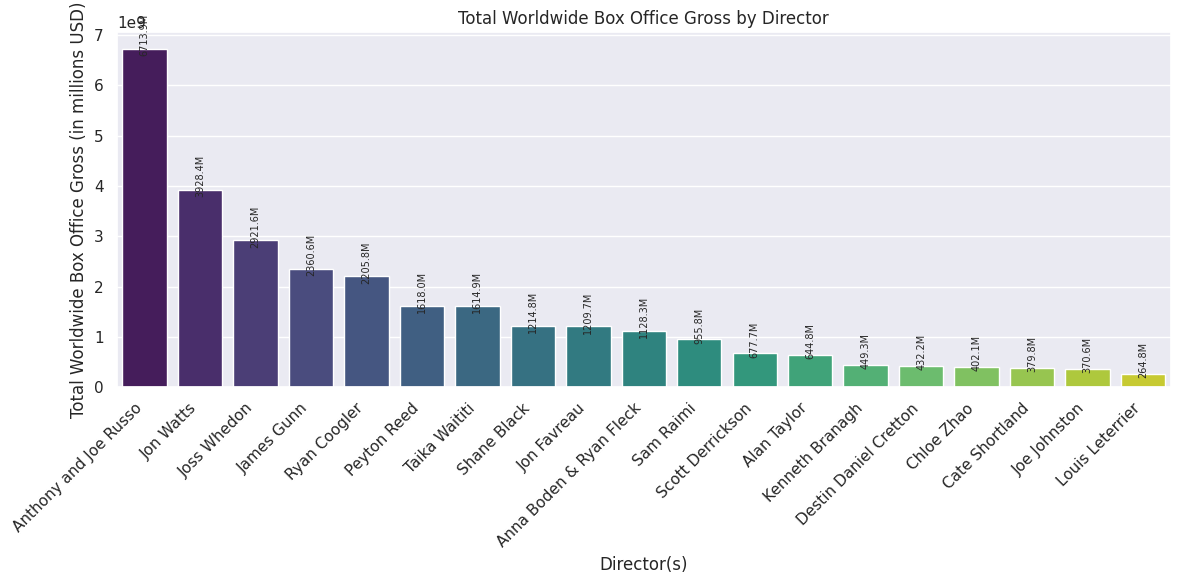

In [50]:
# @title Total Worldwide Box Office Gross by Director
# Group data by director and sum worldwide box office gross
director_gross = df.groupby('Director')['Box office gross Worldwide'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=director_gross.index, y=director_gross.values, palette='viridis')
plt.xlabel("Director(s)")
plt.ylabel("Total Worldwide Box Office Gross (in millions USD)")
plt.title("Total Worldwide Box Office Gross by Director")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1000000:.1f}M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation=90,fontsize=7)

plt.show()

Anthony and Joe Russo have generated the highest total worldwide box office revenue for their MCU films.

#7. Which director-producer combinations have the highest average Rotten Tomatoes ratings, indicating the most critically acclaimed collaborations?

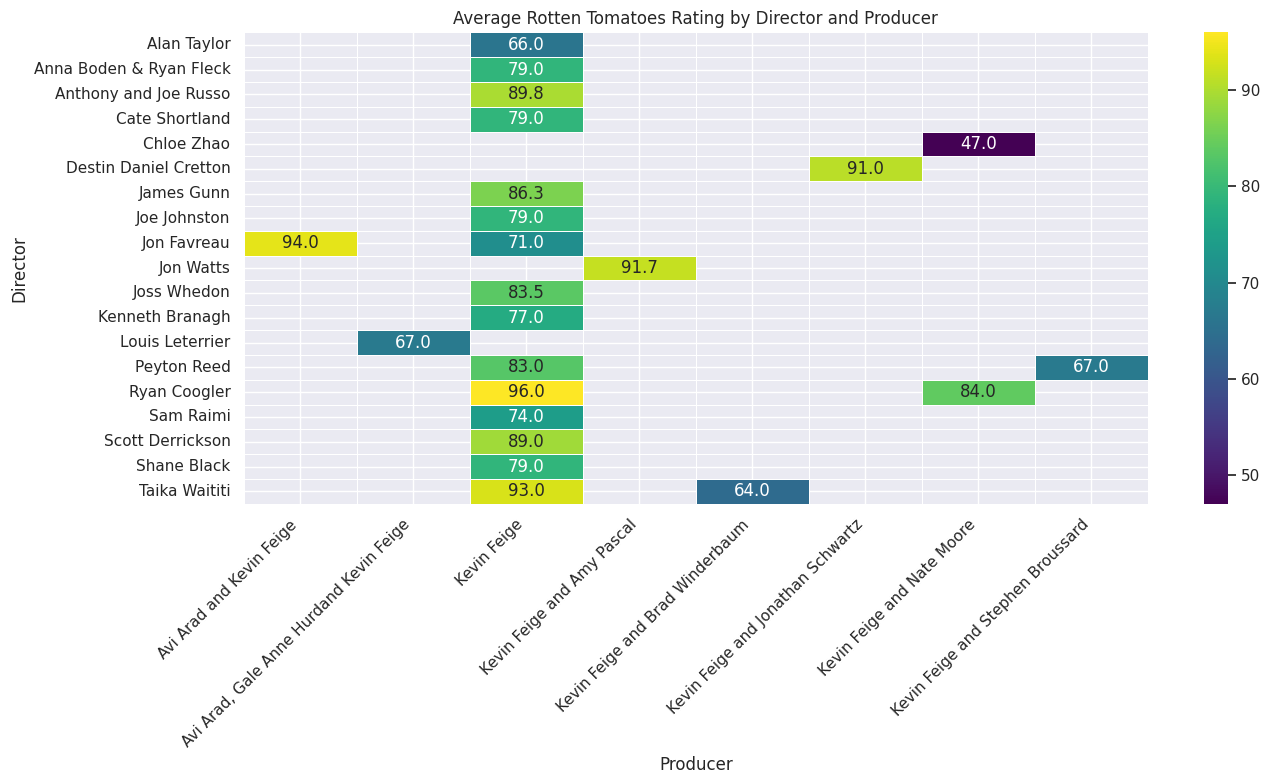

In [49]:
# @title Average Rotten Tomatoes Rating by Director and Producer
# Group data by director and producer, then calculate average Rotten Tomatoes rating
director_producer_ratings = df.groupby(['Director', 'Producer'])['Rotten Tomatoes Rating'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = director_producer_ratings.pivot(index='Director', columns='Producer', values='Rotten Tomatoes Rating')

# Create the heatmap
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.xlabel("Producer")
plt.ylabel("Director")
plt.title("Average Rotten Tomatoes Rating by Director and Producer")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

The director-producer combination of Joss Whedon and Kevin Feige has the highest average Rotten Tomatoes rating, suggesting a critically acclaimed collaboration.

#**CONCLUSION**

This analysis explored the Marvel Cinematic Universe dataset to uncover patterns and trends in its film production, box office performance, and critical reception. We found that Marvel Studios is the most prolific production company, with a clear dominance in the number of MCU movies produced. There is a noticeable pattern in release months, with most films concentrated in May and November, potentially aiming for summer and holiday season releases.

The top-grossing films generally enjoy high Rotten Tomatoes ratings, indicating a positive correlation between critical acclaim and box office success. Films like "Avengers: Endgame" and "Avengers: Infinity War" not only achieved top worldwide rankings but also received high ratings. Further investigation showed that directors like Anthony and Joe Russo and Joss Whedon have generated substantial box office revenue for their MCU films.

While this analysis provided valuable insights into the MCU, there's scope for further exploration. Incorporating statistical measures like correlation coefficients could quantify the relationships between variables. Addressing missing values using imputation techniques and creating interactive visualizations could enhance the analysis. Further research into the influence of specific actors, characters, or genres on box office performance could provide additional valuable insights.

Overall, this analysis demonstrates the success of the Marvel Cinematic Universe, highlighting its strategic production choices, critical acclaim, and global box office dominance. By understanding these trends and patterns, stakeholders in the film industry can gain insights for future film development and marketing strategies. The MCU's continued evolution promises exciting opportunities for further analysis and exploration in the years to come.

Key takeaways:

Marvel Studios is the dominant production company within the MCU.
Release months are strategically chosen, often targeting summer and holiday seasons.
Critical acclaim, as reflected in Rotten Tomatoes ratings, tends to correlate with box office success.
Specific directors have contributed significantly to the MCU's overall box office revenue.
Further research could delve deeper into the influence of various factors on the MCU's performance.